### `Disease Prediction Classification with Machine Learning Algorithm`

#### import necessary libraries especially `Scikit-Learn` package

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

### <center> Data Collection and Analyzing

#### Here is the time of reading training dataset

In [3]:
data_train = pd.read_csv('/Users/rezakharamani/Documents/GitHub/DiseasePredictionClassification/dataset/Training.csv')

In [16]:
## Notice : in this CSV file the last column is completely empty and it should not be considered in the training section
data_train = data_train.iloc[:, :-1]
data_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


#### Working on Target Column in order to be analyzed 

In [33]:
TargetLabel = data_train["prognosis"].value_counts()
DataFrame = pd.DataFrame({
    "Desiase": TargetLabel.index,
    "Count" : TargetLabel.values
})
print(f"The Number of recognized diseases is {len(DataFrame)} that the Number of each of them is {DataFrame.iloc[1,1]}")

The Number of recognized diseases is 41 that the Number of each of them is 120


In [26]:
DataFrame

,Desiase,Count
0,Fungal infection,120
1,Hepatitis C,120
2,Hepatitis E,120
3,Alcoholic hepatitis,120
4,Tuberculosis,120
5,Common Cold,120
6,Pneumonia,120
7,Dimorphic hemmorhoids(piles),120
8,Heart attack,120
9,Varicose veins,120


#### We want to plot the Disease oin the barchar or graph chart 

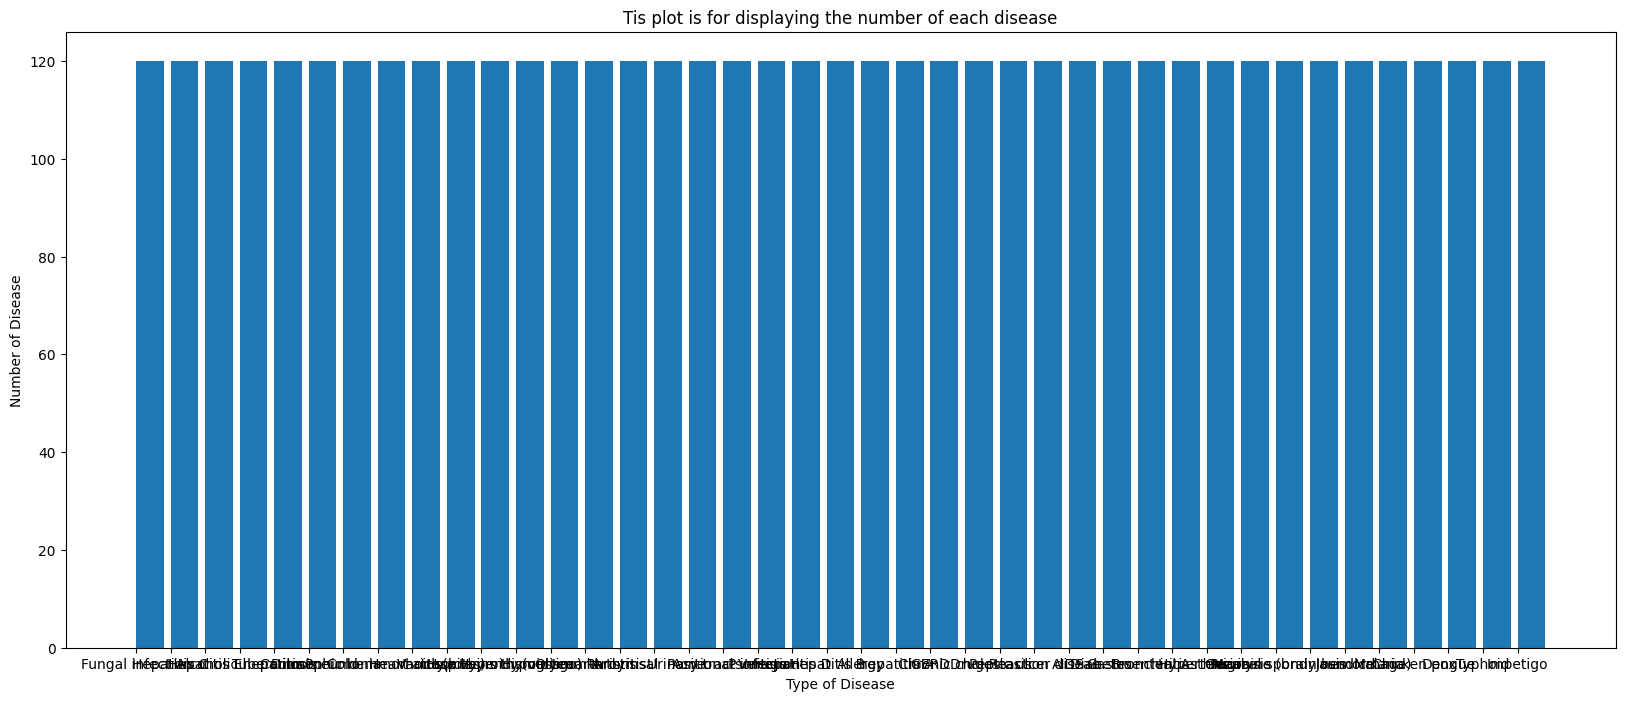

In [52]:
plt.figure(figsize=(20,8))
plt.bar(x=DataFrame.iloc[:,0], height=DataFrame.iloc[:,1])
plt.title("Tis plot is for displaying the number of each disease")
plt.xlabel("Type of Disease")
plt.ylabel("Number of Disease")
plt.show()


## <center> Data Cleaning and Imputing (Imputation)